1. Tomando como base este tutorial, crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de validación cruzada.

2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el vídeo 5. Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.

3. En este enlace puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.

4. Plantea el problema anterior con un modelo de regresión usando KNN. En el vídeo 7 hay un ejemplo de regresión con KNN.

5. Usando los datos almacenados en data5.csv, crea un modelo de clasificación usando NaiveBayes y KNN. Haz un estudio inicial de las correlaciones entre las variables.



#2. NaiveBayes en data2

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(41)

data2 = pd.read_csv('data2.csv', encoding = "ISO-8859 -1")


print('media = ', np.mean(data2))
print('desviacion = ', np.std(data2, axis=0))
data2.head()

media =  0.6971044062263644
desviacion =  Feature_1    1.241154
Feature_2    1.286430
Label        0.400000
dtype: float64


,Feature_1,Feature_2,Label
0,0.496714,0.000000,0.0
1,0.647689,1.523030,0.0
2,0.000000,0.000000,0.0
3,1.579213,0.767435,0.0
4,0.000000,0.542560,0.0


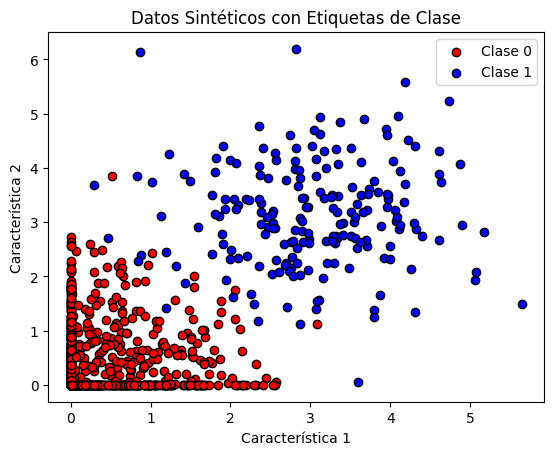

In [ ]:
import matplotlib.pyplot as plt

COLORS = ('red', 'blue')

for i in data2['Label'].astype(int).unique():
    plt.scatter(data2[data2['Label'] == i]['Feature_1'],
                data2[data2['Label'] == i]['Feature_2'],
                c=COLORS[i], edgecolor='k', label=f"Clase {i}")

plt.title('Datos Sintéticos con Etiquetas de Clase')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.show()

crear conjunto de entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

# Combinar datos de ambas clases
X = np.column_stack((data2['Feature_1'], data2['Feature_2']))
y = data2['Label']

# Dividir el conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Seleccionamos el modelo

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Predicciones y evaluación

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Clase 0', 'Clase 1']))

Precisión del modelo: 0.99

Informe de clasificación:
              precision    recall  f1-score   support

     Clase 0       0.99      0.99      0.99       156
     Clase 1       0.98      0.98      0.98        44

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



Matriz de confusión

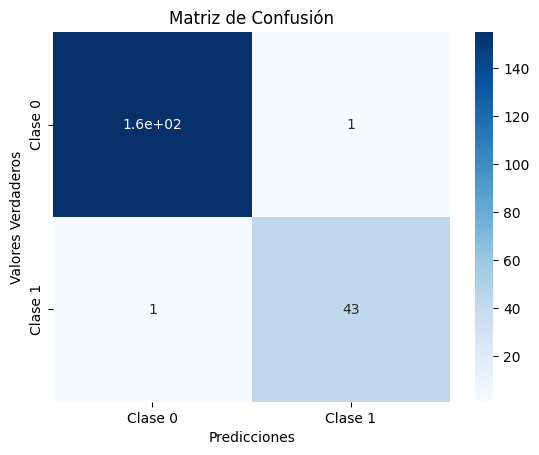

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

classes = ('Clase 0', 'Clase 1')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# 3. dataset de vino rojo portugués "Vinho Verde" y la calidad del mismo. NaiveBayes (GaussianNB)

In [ ]:
dataWineQuality = pd.read_csv('winequality-red.csv', sep = ',', encoding = "ISO-8859 -1")


print('media = ', np.mean(dataWineQuality))
print('desviacion = ', np.std(dataWineQuality, axis=0))

dataWineQuality.head()

media =  7.926036165311652
desviacion =  fixed acidity            1.740552
volatile acidity         0.179004
citric acid              0.194740
residual sugar           1.409487
chlorides                0.047051
free sulfur dioxide     10.456886
total sulfur dioxide    32.885037
density                  0.001887
pH                       0.154338
sulphates                0.169454
alcohol                  1.065334
quality                  0.807317
dtype: float64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


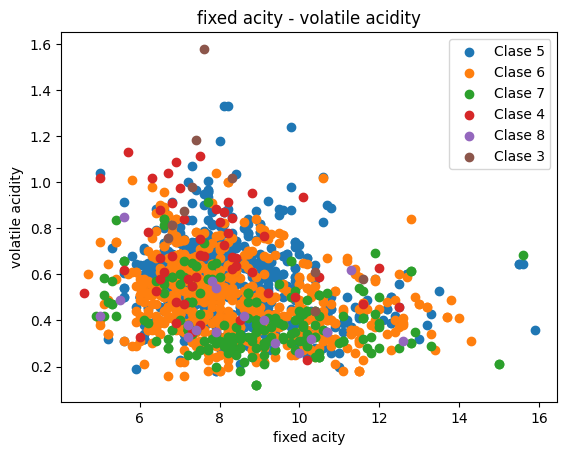

In [ ]:
for i in dataWineQuality['quality'].astype(int).unique():
    plt.scatter(dataWineQuality[dataWineQuality['quality'] == i]['fixed acidity'],
                dataWineQuality[dataWineQuality['quality'] == i]['volatile acidity'],
                label=f"Clase {i}")

plt.title('fixed acity - volatile acidity')
plt.xlabel('fixed acity')
plt.ylabel('volatile acidity')
plt.legend()

plt.show()

In [ ]:
X = np.column_stack((dataWineQuality['fixed acidity'], dataWineQuality['volatile acidity'], dataWineQuality['citric acid'], dataWineQuality['residual sugar'], dataWineQuality['chlorides'], dataWineQuality['free sulfur dioxide']
                     , dataWineQuality['total sulfur dioxide'], dataWineQuality['density'], dataWineQuality['pH'], dataWineQuality['sulphates'], dataWineQuality['alcohol']))
y = dataWineQuality['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Clase 3', 'Clase 4', 'Clase 5', 'Clase 6', 'Clase 7', 'Clase 8']))

Precisión del modelo: 0.55

Informe de clasificación:
              precision    recall  f1-score   support

     Clase 3       0.00      0.00      0.00         1
     Clase 4       0.17      0.10      0.12        10
     Clase 5       0.65      0.65      0.65       130
     Clase 6       0.53      0.52      0.52       132
     Clase 7       0.43      0.50      0.46        42
     Clase 8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.30      0.30      0.29       320
weighted avg       0.54      0.55      0.55       320



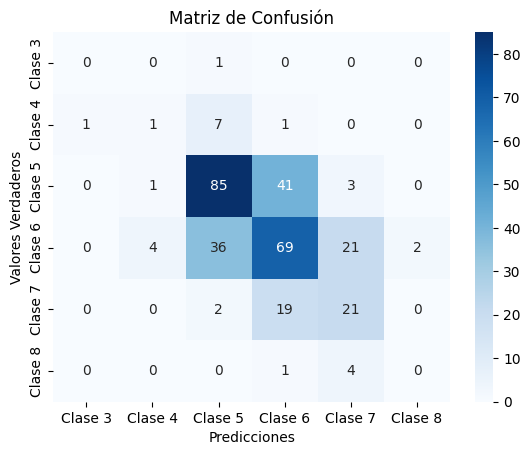

In [ ]:
cm = confusion_matrix(y_test, y_pred)

classes = ('Clase 3', 'Clase 4', 'Clase 5', 'Clase 6', 'Clase 7', 'Clase 8')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# 5. NaiveBayes en data5

In [ ]:
data5 = pd.read_csv('data5.csv', sep = ',', encoding = "ISO-8859 -1")


print('media = ', np.mean(data5))
print('desviacion = ', np.std(data5, axis=0))

data5.head()

media =  0.01800738715654335
desviacion =  feature_1    1.325028
feature_2    1.238078
feature_3    1.105083
feature_4    0.898049
feature_5    1.007837
target       0.814859
dtype: float64


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-2.250270,-1.646135,1.436570,1.148096,-0.223791,2.0
1,-1.785269,-0.565972,1.346475,1.041822,-0.697704,2.0
2,1.589542,0.796631,-1.328454,-1.005298,1.753727,1.0
3,1.832943,-0.284234,-1.907732,-1.272604,-0.718502,0.0
4,1.012438,0.080761,-0.998305,-0.524684,-1.071300,0.0


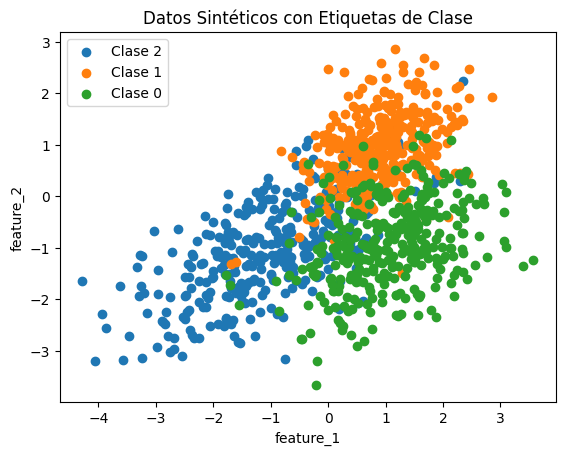

In [ ]:
for i in data5['target'].astype(int).unique():
    plt.scatter(data5[data5['target'] == i]['feature_1'],
                data5[data5['target'] == i]['feature_2'],
                label=f"Clase {i}")

plt.title('Datos Sintéticos con Etiquetas de Clase')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.legend()

plt.show()

In [ ]:
# Combinar datos de ambas clases
X = np.column_stack((data5['feature_1'], data5['feature_2'], data5['feature_3'], data5['feature_4'], data5['feature_5']))
y = data5['target']

# Dividir el conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Clase 0', 'Clase 1', 'Clase 2']))

Precisión del modelo: 0.815

Informe de clasificación:
              precision    recall  f1-score   support

     Clase 0       0.81      0.82      0.81        67
     Clase 1       0.79      0.84      0.82        58
     Clase 2       0.84      0.79      0.81        75

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.82       200
weighted avg       0.82      0.81      0.81       200



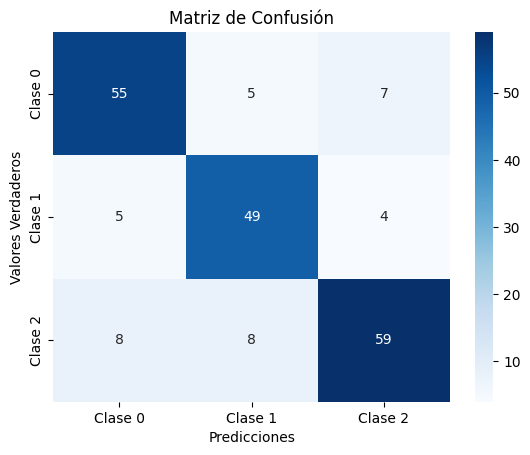

In [ ]:
cm = confusion_matrix(y_test, y_pred)

classes = ('Clase 0', 'Clase 1', 'Clase 2')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()